# matplotlib를 사용하여 데이터 시각화 실습

#### 1. 필요한 라이브러리(matplotlib, pandas)를 설치하고, Python 환경을 설정합니다.

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings 메세지제거
import warnings
warnings.filterwarnings('ignore')

#### 2. 제공된 CSV 파일을 pandas를 사용하여 불러오고, 데이터프레임으로 변환합니다.

In [115]:
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')

In [117]:
print(df_train.shape,df_test.shape)
df_train.head()

(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3. 데이터의 기초 통계를 확인하고, 결측값이나 이상치를 처리합니다.

In [120]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [122]:
# 결측값 확인
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> Age와 Cabin, Embarked에 결측값이 존재.
> 
> Carbin의 경우 891개의 데이터 중 687개의 데이터가 결측값

In [180]:
# 1. Age의 경우 class별 평균 나이로 대치
df_train.groupby('Pclass')['Age'].mean()

Pclass
1    37.832442
2    29.834886
3    25.709066
Name: Age, dtype: float64

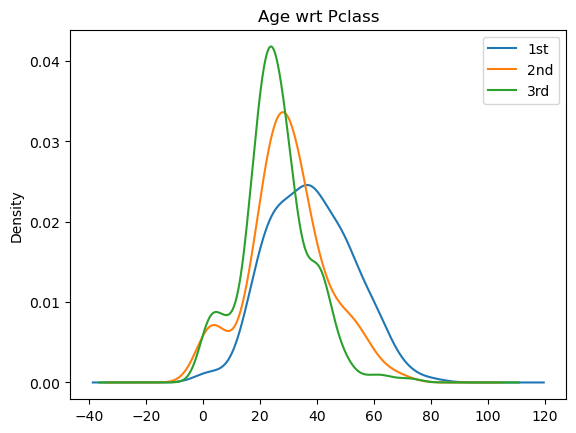

In [188]:
for x in [1,2,3]:
    df_train.Age[df_train.Pclass == x].plot(kind="kde")
plt.title("Age wrt Pclass")
plt.legend(("1st","2nd","3rd"))

In [127]:
class_means = df_train.groupby('Pclass')['Age'].transform('mean')
class_means = df_test.groupby('Pclass')['Age'].transform('mean')

df_train['Age'].fillna(class_means, inplace=True)
df_test['Age'].fillna(class_means, inplace=True)

In [129]:
# 2. Carbin의 경우 데이터를 살리기 어렵다고 판단되어 drop
df_train = df_train.drop(["Cabin"], axis = 1)
df_test = df_test.drop(["Cabin"], axis = 1)

print(df_train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


train Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

test Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


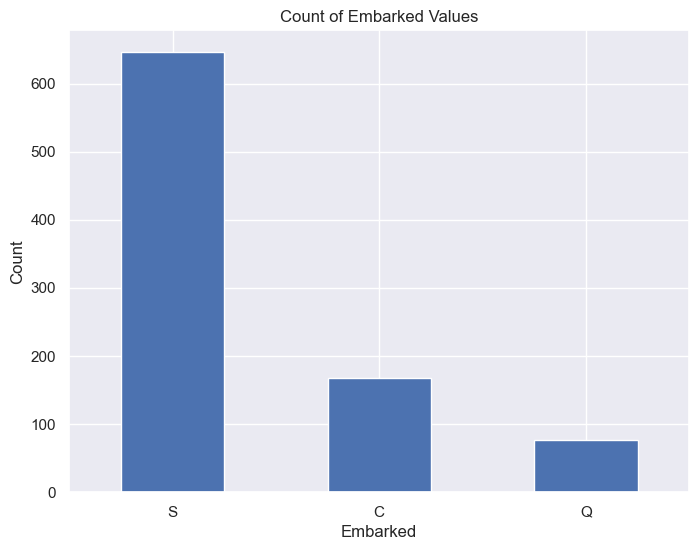

In [255]:
# 3. Embarked는 최빈값으로 대치
print("train", df_train["Embarked"].value_counts().sort_values(ascending = False))
print("\ntest", df_test["Embarked"].value_counts().sort_values(ascending = False))

plt.figure(figsize=(8, 6))
df_train.Embarked.value_counts().plot(kind="bar")
plt.title('Count of Embarked Values')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [133]:
df_train["Embarked"].fillna("S", inplace = True)
df_test["Embarked"].fillna("S", inplace = True)

print(df_train["Embarked"].isnull().sum())
print(df_test["Embarked"].isnull().sum() )

0
0


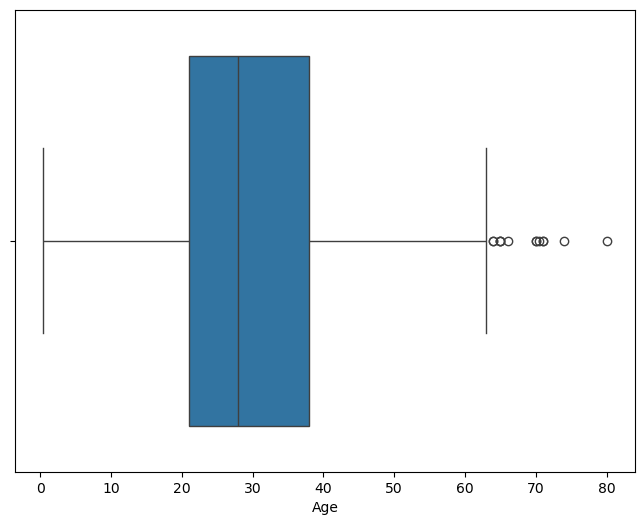

In [145]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=df_train)
plt.xlabel('Age')
plt.show()

#### 4. 막대 그래프를 생성하여 범주형 데이터의 분포를 시각화합니다.

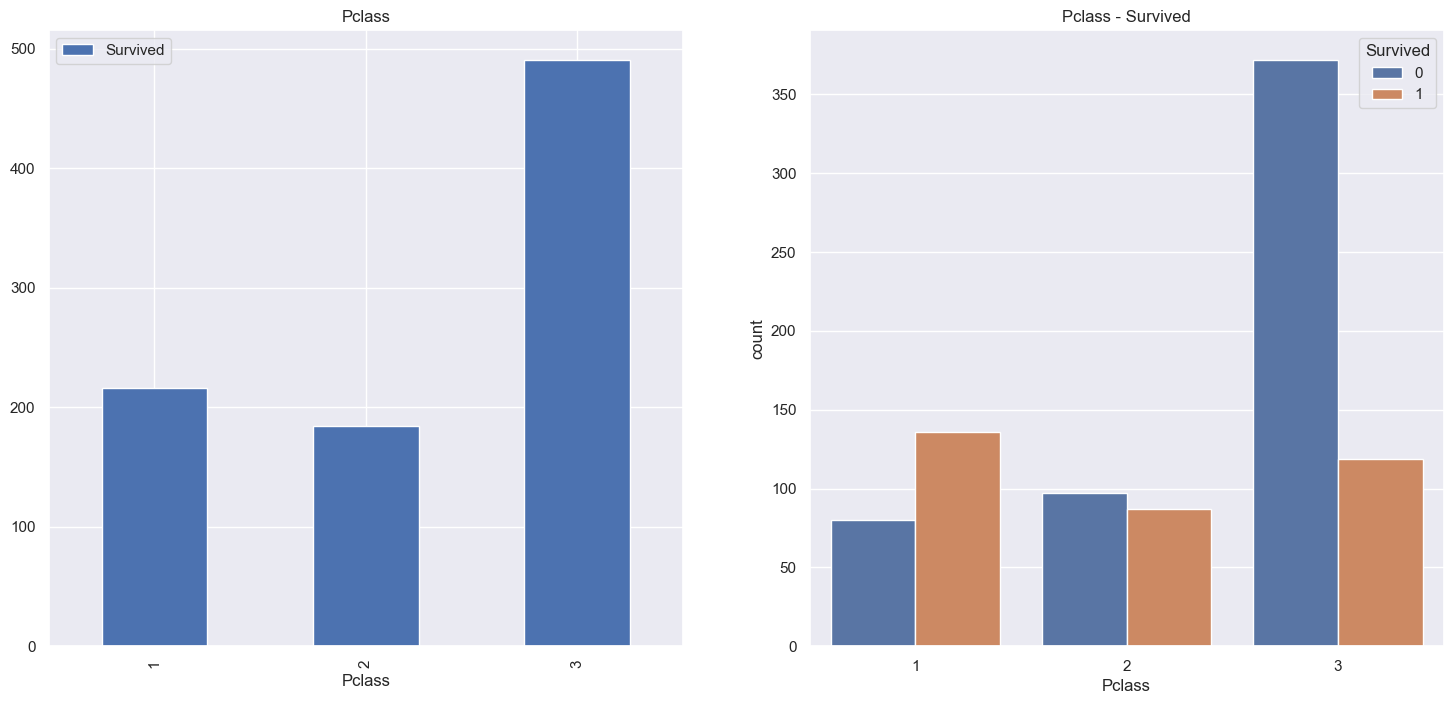

In [265]:
f, ax = plt.subplots(1,2,figsize=(18,8))
bar1=df_train[['Pclass','Survived']].groupby(['Pclass']).count().plot.bar(ax=ax[0])
bar1.set_title('Pclass')

# pclass별 생존자
bar2=sns.countplot(hue='Survived',x='Pclass',data=df_train)
bar2.set_title('Pclass - Survived')
plt.show()

> class1의 생존자가 가장 많음

#### 5. 산점도를 생성하여 두 변수 간의 상관관계를 시각화합니다.

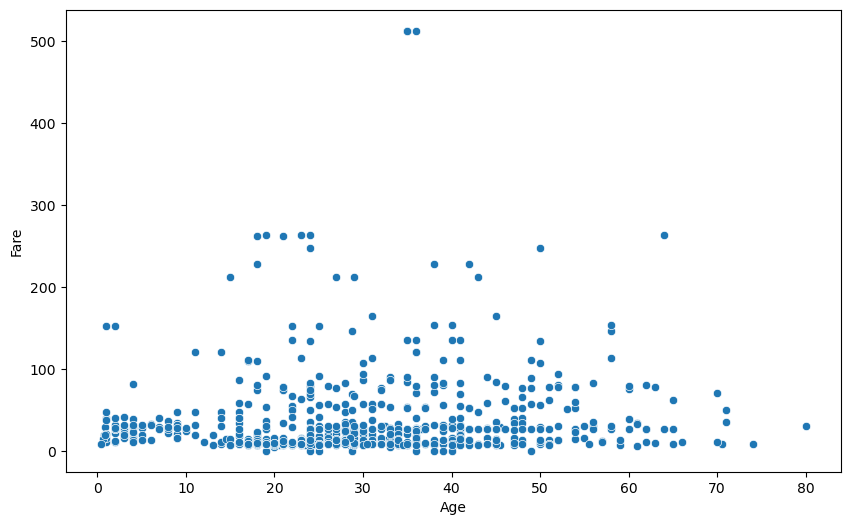

In [168]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df_train)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

#### 6. 히스토그램을 생성하여 데이터의 분포를 시각화합니다.

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

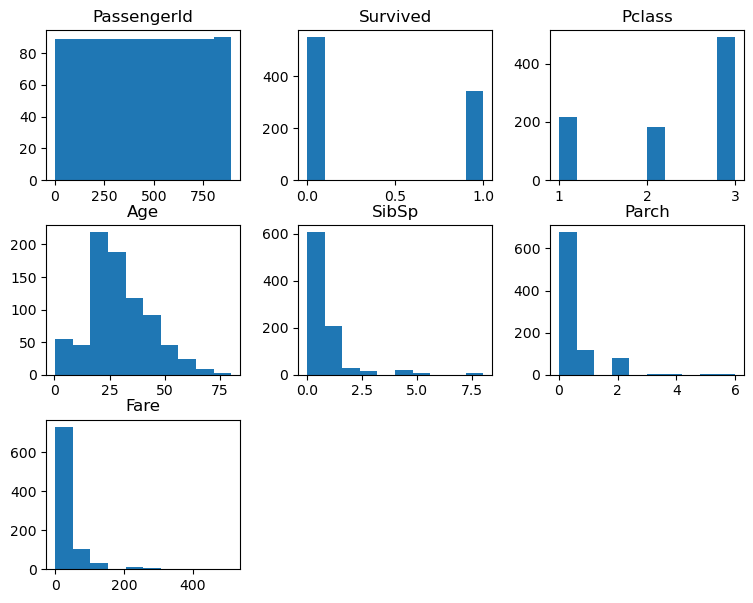

In [150]:
df_train.hist(bins=10,figsize=(9,7),grid=False)

#### 7. 생성된 각 그래프에 제목, 축 레이블, 범례 등을 추가하여 가독성을 높입니다.

<Axes: xlabel='Embarked', ylabel='Fare'>

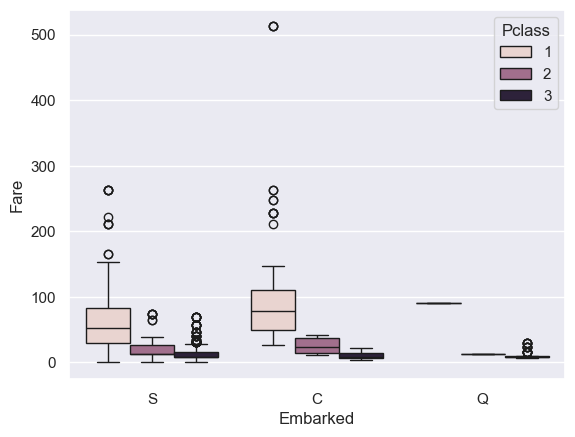

In [215]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=df_train)

#### 8. 시각화 결과를 분석하고, 데이터에서 발견한 주요 패턴과 인사이트를 보고서로 작성합니다.

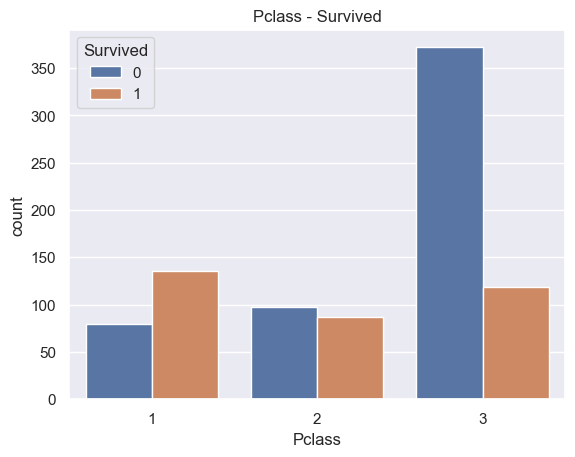

In [225]:
# 1. Pclass가 3인 사람이 가장 많고 1인 사람이 가장 많이 생존
bar2=sns.countplot(hue='Survived',x='Pclass',data=df_train)
bar2.set_title('Pclass - Survived')
plt.show()

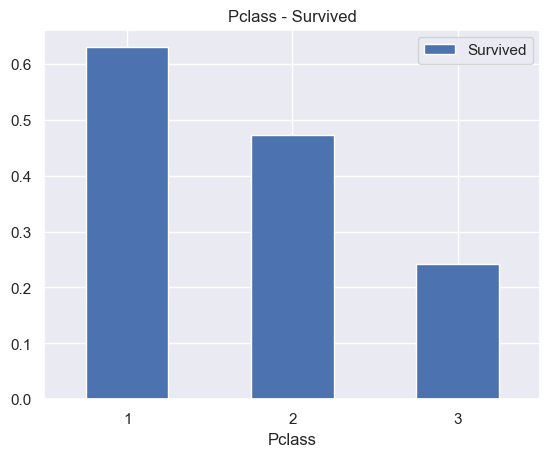

In [241]:
bar3=df_train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()
bar3.set_title('Pclass - Survived')
plt.show()

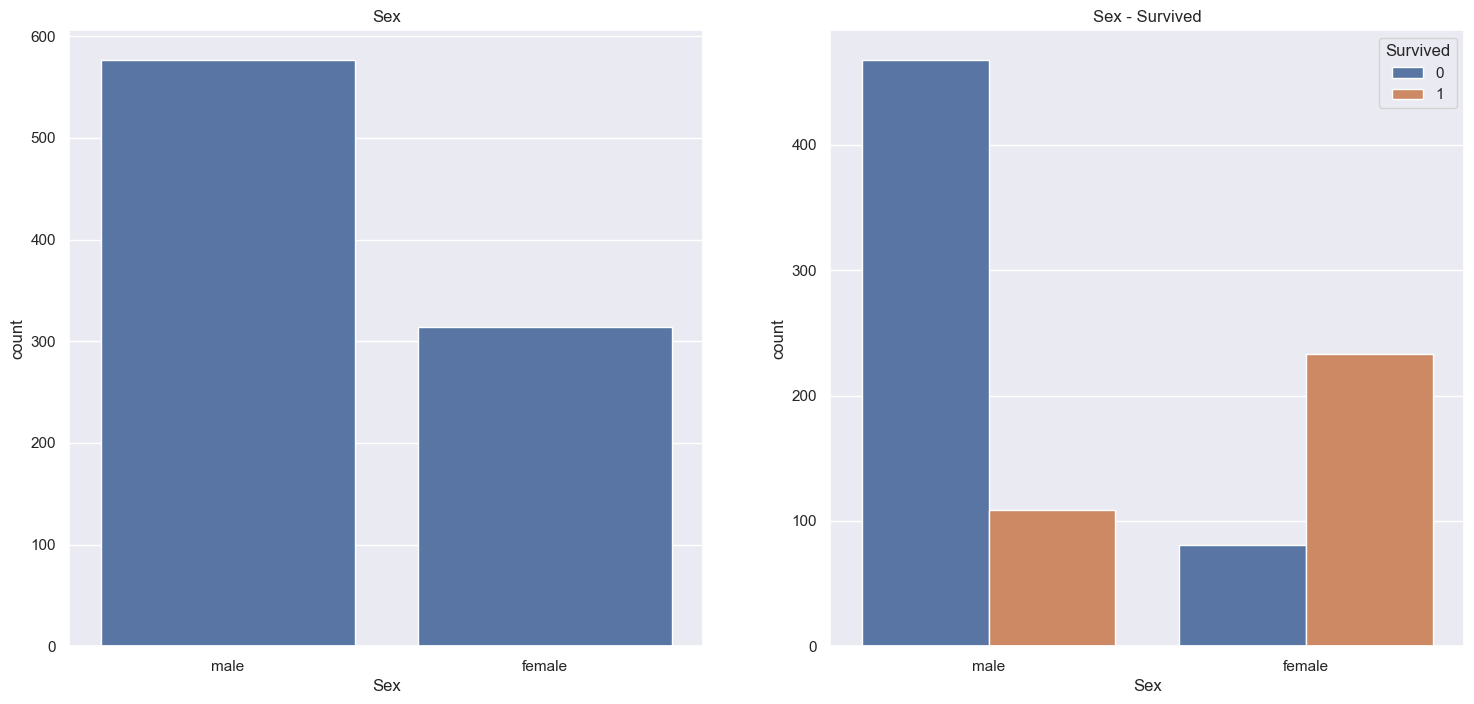

In [267]:
# 2. 여성 생존자가 더 많음 
f, ax = plt.subplots(1,2,figsize=(18,8))
bar1=sns.countplot(x='Sex', data=df_train, ax=ax[0])
bar1.set_title('Sex')
bar2=sns.countplot(hue='Survived',x='Sex',data=df_train)
bar2.set_title('Sex - Survived')
plt.show()

<Axes: xlabel='count', ylabel='title'>

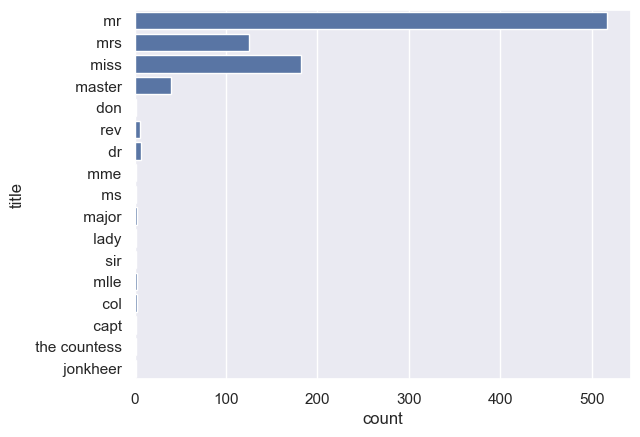

In [283]:
# 3. 기혼 남성이 가장 많다
df_train['title']=""
for i in range(len(df_train['Name'])):
    df_train['title'][i]=df_train['Name'][i].split(',')[1].split('.')[0].lower()
sns.countplot(y='title',data=df_train)

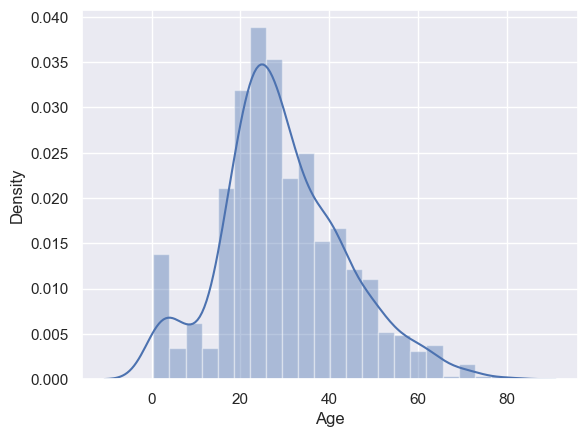

In [287]:
# 4. 20~40세에 분포가 높다
sns.distplot(df_train[df_train['Age']>0]['Age'])
plt.show()

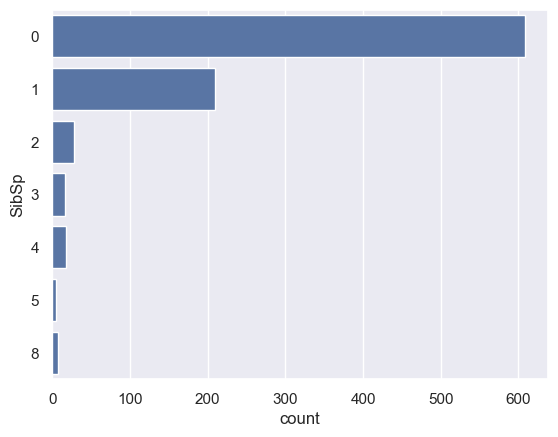

In [291]:
# 5. 형제가 없는 사람이 가장 많다
sns.countplot(y='SibSp', data=df_train)
plt.show()

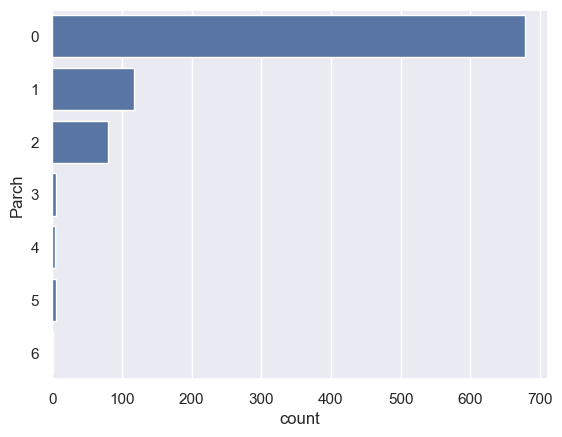

In [295]:
# 6. 혼자인 경우가 많다.
sns.countplot(y='Parch', data=df_train)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

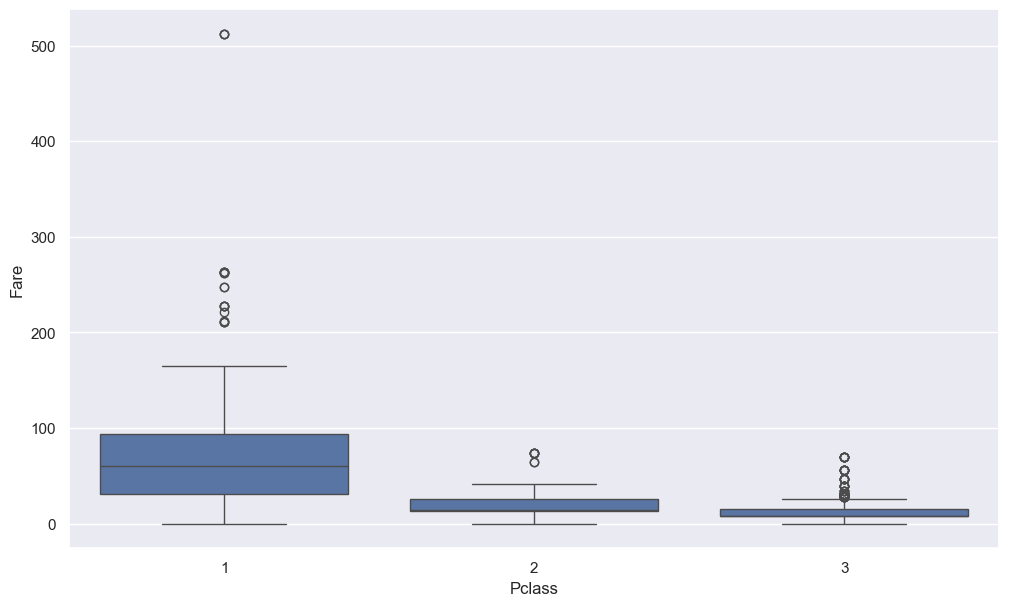

In [297]:
# 7. Pclass1이 가장 비싼 티켓
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Fare',data=df_train)

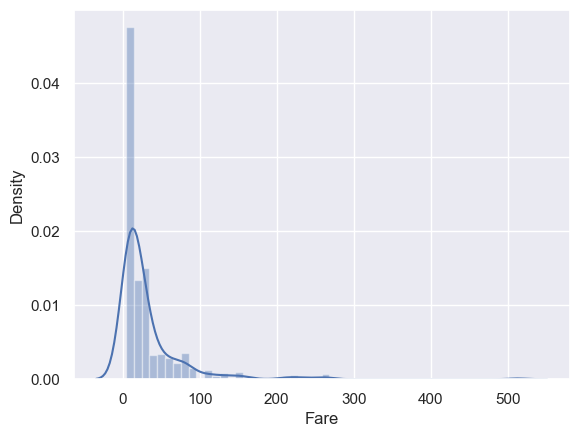

In [303]:
sns.distplot(df_train[df_train['Fare']>0]['Fare'])
plt.show()